In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices


In [2]:
counts = pd.read_csv('./data/BedtoolsCount.counts.csv')
counts_trp53 = pd.read_csv('./data/BedtoolsCount.Trp53.counts.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
counts.columns = counts.columns.str.replace('-','')

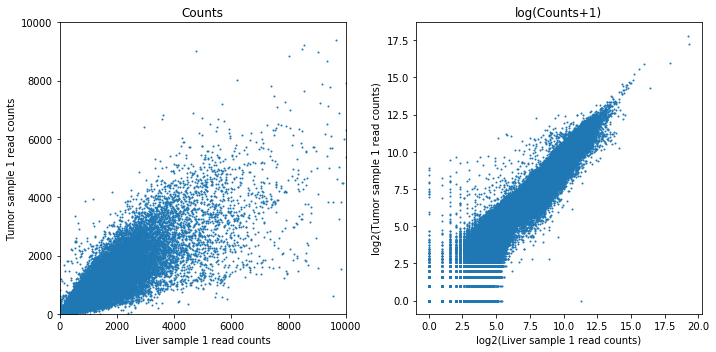

In [28]:

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(10,5)

ax1.scatter(counts['HLWES41'],counts['HLWES21'],s=1)
ax1.set_xlim(0,10000) #outliers distort view
ax1.set_ylim(0,10000)
ax1.set_xlabel('Liver sample 1 read counts')
ax1.set_ylabel('Tumor sample 1 read counts')
ax1.set_title('Counts')

ax2.scatter(np.log2(counts['HLWES40']+1),np.log2(counts['HLWES21']+1),s=1)
ax2.set_xlabel('log2(Liver sample 1 read counts)')
ax2.set_ylabel('log2(Tumor sample 1 read counts)')
ax2.set_title('log(Counts+1)')

plt.tight_layout()
plt.savefig('./plots/scatter.png')

In [80]:
y, X = dmatrices('HLWES21 ~ HLWES40', data=counts, return_type='dataframe')

In [81]:
poisson_model = sm.GLM(y, X, family=sm.families.Poisson())
poisson_model_results = poisson_model.fit()
print(poisson_model_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HLWES21   No. Observations:               273121
Model:                            GLM   Df Residuals:                   273119
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5919e+07
Date:                Sun, 03 Feb 2019   Deviance:                   1.7040e+08
Time:                        17:09:47   Pearson chi2:                 3.70e+08
No. Iterations:                    11   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4212      0.000   4.27e+04      0.000       5.421       5.421
HLWES40     1.128e-05   2.07e-09   5446.393      0.0

(0, 60)

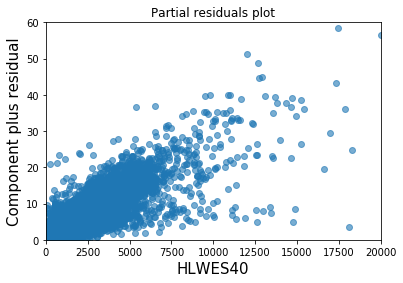

In [75]:
fig = poisson_model_results.plot_partial_residuals('HLWES40')
plt.scatter(X['HLWES40'],poisson_model_results.fittedvalues,color='green')
plt.xlim(0,20000)
plt.ylim(0,60)

In [82]:
poisson_model_results.fittedvalues

0         226.159590
1         226.159590
2         226.159590
3         226.159590
4         226.159590
5         226.159590
6         226.159590
7         226.159590
8         226.159590
9         226.159590
10        226.159590
11        226.159590
12        226.159590
13        226.159590
14        226.159590
15        226.159590
16        226.159590
17        226.159590
18        226.159590
19        226.159590
20        226.159590
21        226.159590
22        226.159590
23        226.159590
24        226.159590
25        226.159590
26        226.159590
27        226.159590
28        226.159590
29        226.159590
             ...    
273091    226.187657
273092    226.205519
273093    226.177450
273094    226.271878
273095    226.259115
273096    226.200415
273097    226.180002
273098    226.172347
273099    226.174899
273100    226.243800
273101    226.215727
273102    226.220831
273103    226.185105
273104    226.190208
273105    227.018473
273106    226.182553
273107    227

(-15000, 10000)

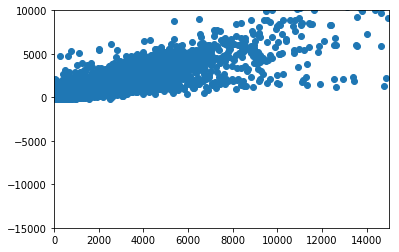

In [60]:
plt.scatter(X['HLWES40'],poisson_model_results.resid_response)
#plt.scatter(X['HLWES40'],poisson_model_results.predict(X).shape - y)
#plt.scatter(X['HLWES40'], poisson_model_results.predict(X).values - y['HLWES21'].values,s=1)
plt.xlim(0,15000)
plt.ylim(-15000,10000)

In [59]:
X_test = pd.DataFrame({'HLWES40':np.arange(X['HLWES40'].min(),X['HLWES40'].max())})
X_test['Intercept'] = [1.0]*X_test.shape[0]
#plt.scatter(X['HLWES40'].values, y,s=1)
#plt.scatter(X_test['HLWES40'].values,poisson_model_results.predict(X_test).values,color='green',s=1)
#plt.xlim(0,15000)
#plt.ylim(0,10000)
poisson_model_results.predict(X_test).values
X_test

,HLWES40,Intercept
0,0.0,1.0
1,1.0,1.0
2,2.0,1.0
3,3.0,1.0
4,4.0,1.0
5,5.0,1.0
6,6.0,1.0
7,7.0,1.0
8,8.0,1.0
9,9.0,1.0


In [3]:
y, X = dmatrices('np.log(HLWES18+1) ~ np.log(HLWES40+1)', data=counts, return_type='dataframe')
gaussian_model = sm.GLM(y, X, family=sm.families.Gaussian())
gaussian_model_results = gaussian_model.fit()
print(gaussian_model_results.summary())

NameError: name 'dmatrices' is not defined

In [2]:
gaussian_model_results.

NameError: name 'gaussian_model_results' is not defined

In [1]:
#fig = gaussian_model_results.plot_partial_residuals('np.log(HLWES40 + 1)')


In [25]:
nb_model = sm.GLM(y, X, family=sm.families.NegativeBinomial())
nb_model_results = nb_model.fit()
nb_model_results.null_deviance
print(nb_model_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HLWES18   No. Observations:               273121
Model:                            GLM   Df Residuals:                   273119
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3172e+06
Date:                Sun, 03 Feb 2019   Deviance:                   1.4637e+05
Time:                        13:41:19   Pearson chi2:                 3.61e+06
No. Iterations:                    10   Covariance Type:             nonrobust
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.5296      0.005   -102.660      0.000      -0.540      -0.520
np.log(HLWES40 + 1)     1

In [28]:
nb_model_results.null_deviance

1154047.941023853

$$(a+b)^{2} = a^{2}+2ab+b^{2}$$
$(a+b)^{2} = a^{2}+2ab+b^{2}$